In [ ]:
%pip install librosa numpy matplotlib > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa # type: ignore

from transform import *

In [3]:
FIGSAVE = dict(format='svg', bbox_inches='tight')
FIGSAVE

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'serif']

plt.rcParams['mathtext.fontset'] = 'cm'  # or 'cm' for Computer Modern
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['mathtext.it'] = 'serif:italic'
plt.rcParams['mathtext.bf'] = 'serif:bold'


# Task 1

## 1. Rectangle function

In [4]:
b = 5
a = 3

A = [3, 3, 6]
B = [3, 6, 3]
Lim = list(map(lambda x: 2*x, B))

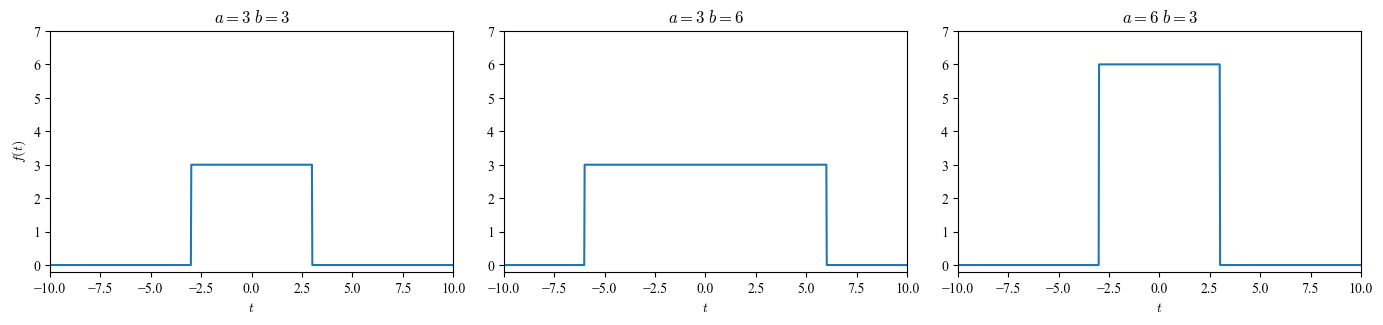

In [5]:
def f1(t:np.ndarray) -> np.ndarray:
    global a, b
    return np.piecewise(t,
        [np.abs(t) <= b],
        [a, 0],

    )

fig, ax = plt.subplots(1, 3, figsize=(14,3))
ax[0].set_ylabel("$f(t)$")
fig.tight_layout()

for a, b, axx in zip(A,B, ax):
    x = np.linspace(-10, 10, 1000)
    axx.set_xlabel("$t$")
    axx.set_xlim([-10,10])
    axx.set_ylim([-.2,7])
    axx.plot(x, f1(x))
    axx.set_title(f'$a={a}$ $b={b}$')

    

%mkdir -p '../fig/task1/func1/'
fig.savefig(fname='../fig/task1/func1/func.svg', **FIGSAVE)

Norm : 54.05405405405406
Transform: 53.97460400368995
Norm : 108.1081081081081
Transform: 108.00157012060332
Norm : 216.21621621621625
Transform: 215.8984160147598


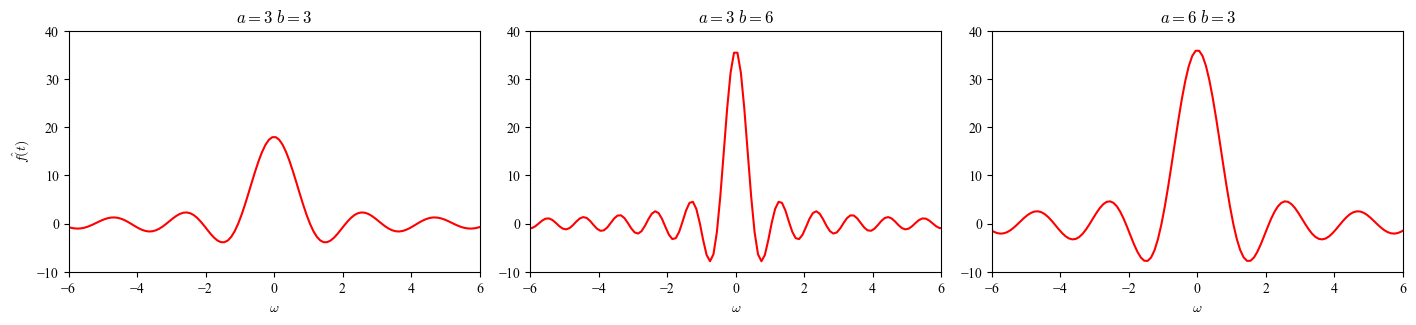

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))
ax1, ax2, ax3 = ax

fig.tight_layout()
ax[0].set_ylabel(r"$f\hat (t)$")


for a, b, axx, lim in zip(A, B, ax, Lim):
    freq, fhat = transform(f1, lim=10)
    axx.set_xlabel(r"$\omega$")
    axx.set_xlim([-6,6])
    axx.set_ylim([-10,40])
    axx.plot(freq, np.real(fhat), color='red', label=f'$a={a}$ $b={b}$')
    axx.set_title(f'$a={a}$ $b={b}$')
    

    # Compute function norm
    norm = np.trapezoid(f1(x)**2, x)
    # Compute right hand side of Parseval's theorem
    rhs = np.trapezoid(np.abs(fhat)**2, freq) / (2*np.pi)

    print(f'Norm : {norm}')
    print (f'Transform: {rhs}')

fig.savefig(fname='../fig/task1/func1/ft_image.svg', **FIGSAVE)

## Triangle Function

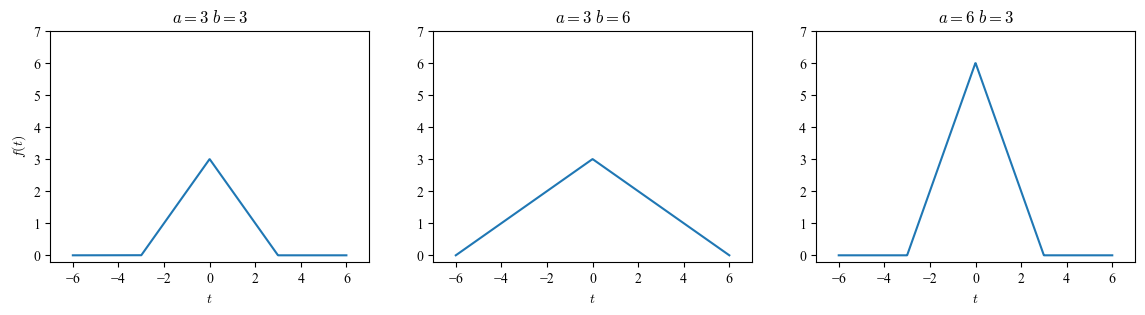

In [7]:
def f2(t: np.ndarray):
    global a, b
    return np.piecewise(t,
        [np.abs(t) <= b],
        [lambda t: a- np.abs(a*t/b)])

fig, ax = plt.subplots(1, 3, figsize=(14,3))

ax[0].set_ylabel("$f(t)$")

for a, b, axx in zip(A, B, ax):
    axx.set_xlabel("$t$")
    axx.set_title(f'$a={a}$ $b={b}$')
    axx.set_xlim([-7,7])
    axx.set_ylim([-.2,7])
    
    x = np.linspace(-lim, lim, 1000)
    axx.plot(x, f2(x))

%mkdir -p '../fig/task1/func2/'
fig.savefig(fname='../fig/task1/func2/func.svg', **FIGSAVE)

Norm : 18.000
Transform: 18.000
Norm : 36.000
Transform: 36.000
Norm : 72.000
Transform: 72.000


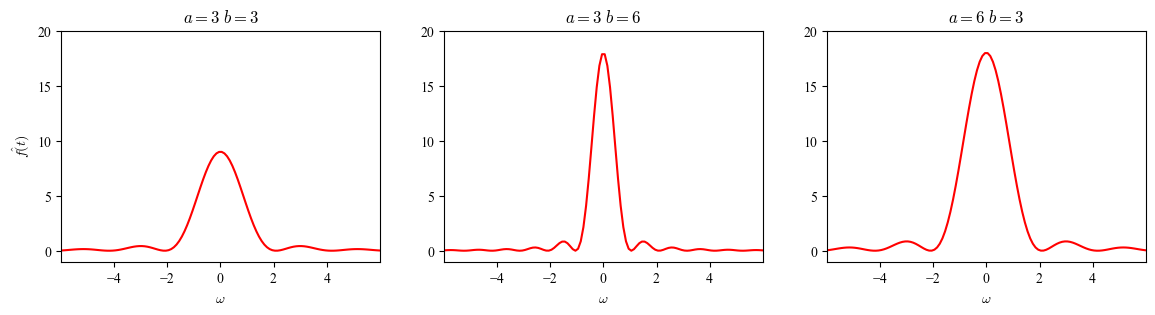

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))

ax[0].set_ylabel(r"$f\hat (t)$")

for a, b, axx, lim in zip(A, B, ax, Lim):
    freq, fhat = transform(f2, lim=10)
    axx.set_xlabel(r"$\omega$")
    axx.set_xlim([-6,6])
    axx.set_ylim([-1,20])
    axx.set_xticks(np.arange(-4,6,2))

    axx.plot(freq, np.real(fhat), color='red')
    axx.set_title(f'$a={a}$ $b={b}$')

    # Compute function norm
    norm = np.trapezoid(f2(x)**2, x)
    # Compute right hand side of Parseval's theorem
    rhs = np.trapezoid(np.abs(fhat)**2, freq) / (2*np.pi)

    print(f'Norm : {norm:.3f}')
    print (f'Transform: {rhs:.3f}')
    
fig.savefig('../fig/task1/func2/ft_image.svg', **FIGSAVE)

## Hyperbolic Sine

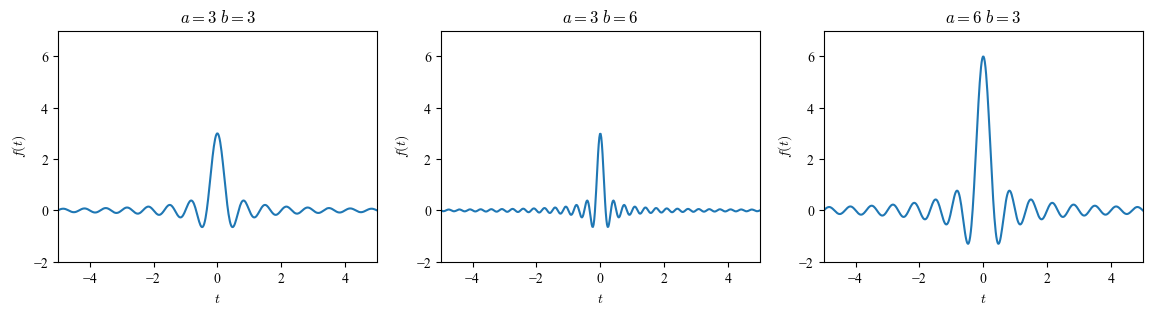

In [9]:
f3 = lambda t: a*np.sinc(b*t)

fig, ax = plt.subplots(1, 3, figsize=(14,3))
ax1, ax2, ax3 = ax

lim = 5
for a, b, axx in zip(A,B, ax):
    x = np.linspace(-2*lim, 2*lim, 1000)
    axx.set_xlim([-lim, lim])
    axx.set_ylim([-2, 7])

    axx.set_xlabel("$t$")
    axx.set_ylabel("$f(t)$")
    axx.plot(x, f3(x))
    axx.set_title(f'$a={a}$ $b={b}$')
%mkdir -p '../fig/task1/func3/'
fig.savefig(fname='../fig/task1/func3/func.svg', **FIGSAVE)

$ cases(a=3,b=3) $
$#lhs = 2.990 approx #rhs = 2.996 $

$ cases(a=3,b=6) $
$#lhs = 1.497 approx #rhs = 1.499 $

$ cases(a=6,b=3) $
$#lhs = 11.959 approx #rhs = 11.984 $



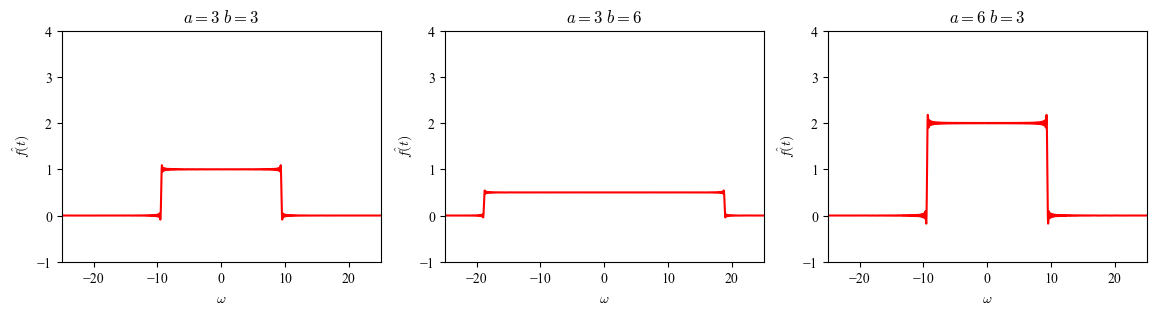

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))
ax1, ax2, ax3 = ax

lim = 25
for a, b, axx in zip(A, B, ax):
    freq, fhat = transform(f3, lim)

    axx.set_xlim([-lim, lim])
    axx.set_ylim([-1, 4])

    axx.set_xlabel(r"$\omega$")
    axx.set_ylabel(r"$f\hat (t)$")
    axx.plot(freq, np.real(fhat), color='red')
    axx.set_title(f'$a={a}$ $b={b}$')

    # Compute function norm
    norm = np.trapezoid(f3(x)**2, x)
    # Compute right hand side of Parseval's theorem
    rhs = np.trapezoid(np.abs(fhat)**2, freq) / (2*np.pi)

    print(f'$ cases(a={a},b={b}) $')
    print(f'$#lhs = {norm:.3f} approx #rhs = {rhs:.3f} $')
    print()

fig.savefig('../fig/task1/func3/ft_image.svg', **FIGSAVE)

## Gauss Function

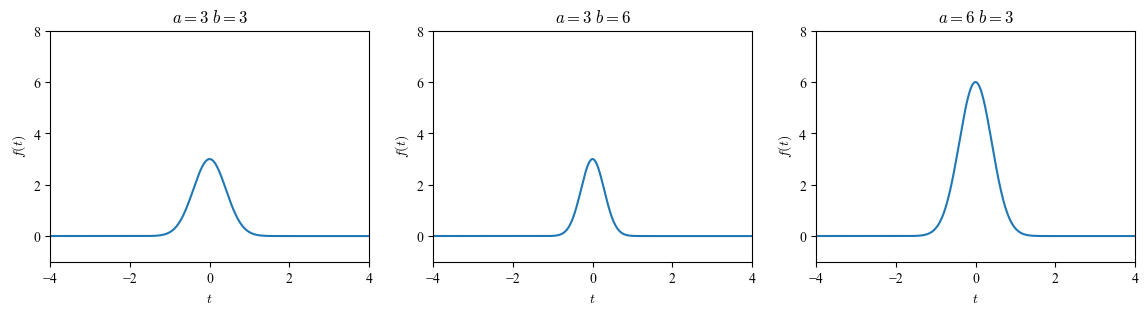

In [11]:
f4 = lambda t: a*np.exp(-b*t*t)

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
ax1, ax2, ax3 = ax

lim = 4
for a, b, axx in zip(A,B, ax):
    x = np.linspace(-7, 7, 1000)
    axx.set_xlim([-lim, lim])
    axx.set_ylim([-1, 8])

    axx.set_xlabel("$t$")
    axx.set_ylabel("$f(t)$")
    axx.plot(x, f4(x))
    axx.set_title(f'$a={a}$ $b={b}$')
%mkdir -p '../fig/task1/func4/'
fig.savefig(fname='../fig/task1/func4/func.svg', **FIGSAVE)

$ cases(a=3,b=3) $
$ #lhs = 6.512 approx #rhs = 6.512 $

$ cases(a=3,b=6) $
$ #lhs = 4.605 approx #rhs = 4.605 $

$ cases(a=6,b=3) $
$ #lhs = 26.050 approx #rhs = 26.050 $



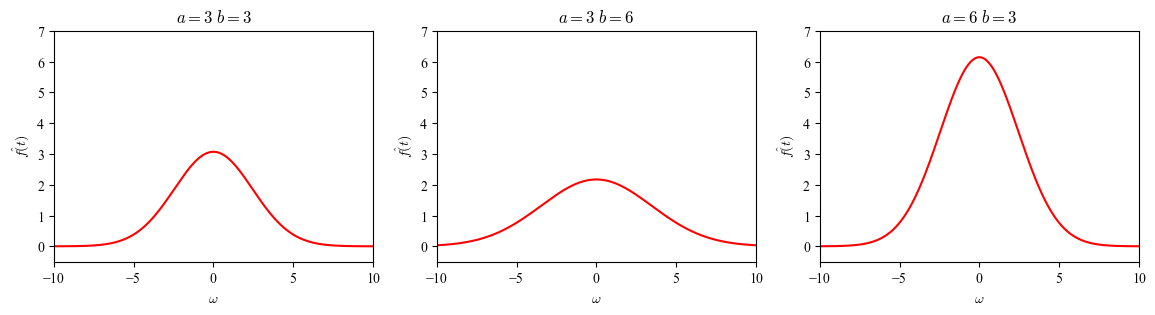

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))


for a, b, axx in zip(A, B, ax):
    freq, fhat = transform(f4, lim=15)

    axx.set_xlim([-10, 10])
    axx.set_ylim([-.5, 7])
    axx.set_xlabel(r"$\omega$")
    axx.set_ylabel(r"$f\hat (t)$")

    axx.plot(freq, np.real(fhat), color='red')
    axx.set_title(f'$a={a}$ $b={b}$')

    # Compute function norm
    norm = np.trapezoid(f4(x)**2, x)
    # Compute right hand side of Parseval's theorem
    rhs = np.trapezoid(np.abs(fhat)**2, freq) / (2*np.pi)

    print(f'$ cases(a={a},b={b}) $')
    print(f'$ #lhs = {norm:.3f} approx #rhs = {rhs:.3f} $')
    print()

fig.savefig('../fig/task1/func4/ft_image.svg', **FIGSAVE)

## Decay with Absolute Value

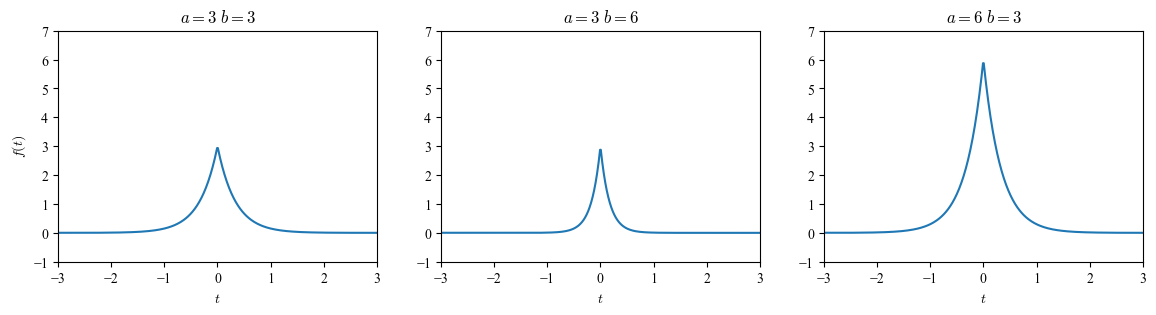

In [13]:
f5 = lambda t: a*np.exp(-b*np.abs(t))

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
ax[0].set_ylabel("$f(t)$")

lim = 3
for a, b, axx in zip(A,B, ax):
    x = np.linspace(-7, 7, 1000)
    axx.set_xlim([-lim, lim])
    axx.set_ylim([-1, 7])

    axx.set_xlabel("$t$")
    axx.plot(x, f5(x))
    axx.set_title(f'$a={a}$ $b={b}$')
%mkdir -p '../fig/task1/func5/'
fig.savefig(fname='../fig/task1/func5/func.svg', **FIGSAVE)

$ cases(a=3,b=3) $
$ #lhs = 2.999 approx #rhs = 2.999 $

$ cases(a=3,b=6) $
$ #lhs = 1.498 approx #rhs = 1.498 $

$ cases(a=6,b=3) $
$ #lhs = 11.996 approx #rhs = 11.996 $



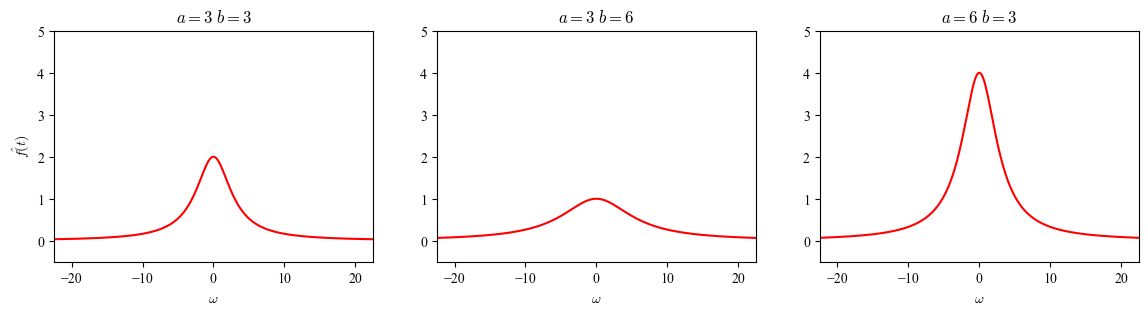

In [14]:
omega5, freq5 = transform(f5, lim*2)

fig, ax = plt.subplots(1, 3, figsize=(14,3))
ax1, ax2, ax3 = ax

ax[0].set_ylabel(r"$f\hat (t)$")

lim = 15
for a, b, axx in zip(A, B, ax):
    freq, fhat = transform(f5, lim=15)
    axx.set_xlim([-1.5*lim, 1.5*lim])
    axx.set_ylim([-.5, 5])

    axx.set_xlabel(r"$\omega$")
    axx.plot(freq, np.real(fhat), color='red')
    axx.set_title(f'$a={a}$ $b={b}$')

    # Compute function norm
    norm = np.trapezoid(f5(x)**2, x)
    # Compute right hand side of Parseval's theorem
    rhs = np.trapezoid(np.abs(fhat)**2, freq) / (2*np.pi)

    print(f'$ cases(a={a},b={b}) $')
    print(f'$ #lhs = {norm:.3f} approx #rhs = {rhs:.3f} $')
    print()

fig.savefig('../fig/task1/func5/ft_image.svg', **FIGSAVE)

# Task 2

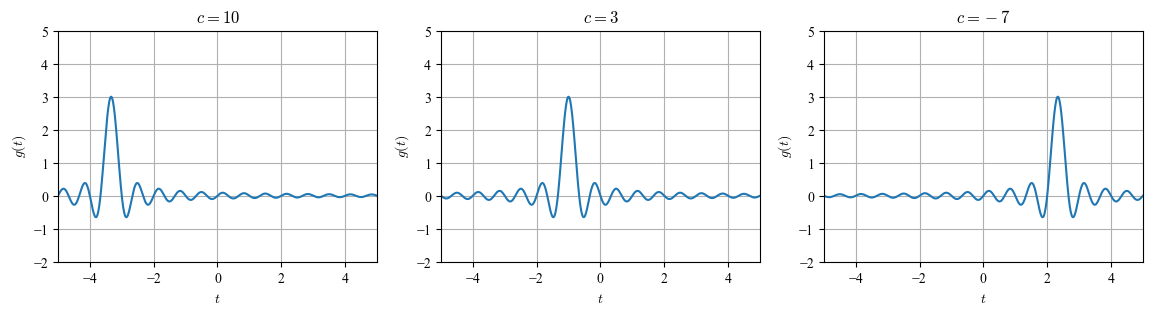

In [15]:
C = [10,3,-7]

def g(t, c):
    return 3*np.sinc(3*t+c)

fig, ax = plt.subplots(1, 3, figsize=(14,3))

lim = 5
for c, axx in zip(C, ax):
    x = np.linspace(-lim, lim*2, 1000)
    y = g(x, c)
    
    axx.grid()
    if c == -15:
        axx.set_xlim([-lim+2, lim+2])
    else:
        axx.set_xlim([-lim, lim])
    axx.set_ylim([-2, 5])
    axx.set_xlabel("$t$")
    axx.set_ylabel("$g(t)$")

    axx.plot(x, y)
    
    if c == 2*np.pi:
        c = r'2\pi'
    axx.set_title(f'$c = {c}$')

%mkdir -p '../fig/task2'
fig.savefig(fname='../fig/task2/func.svg', **FIGSAVE)


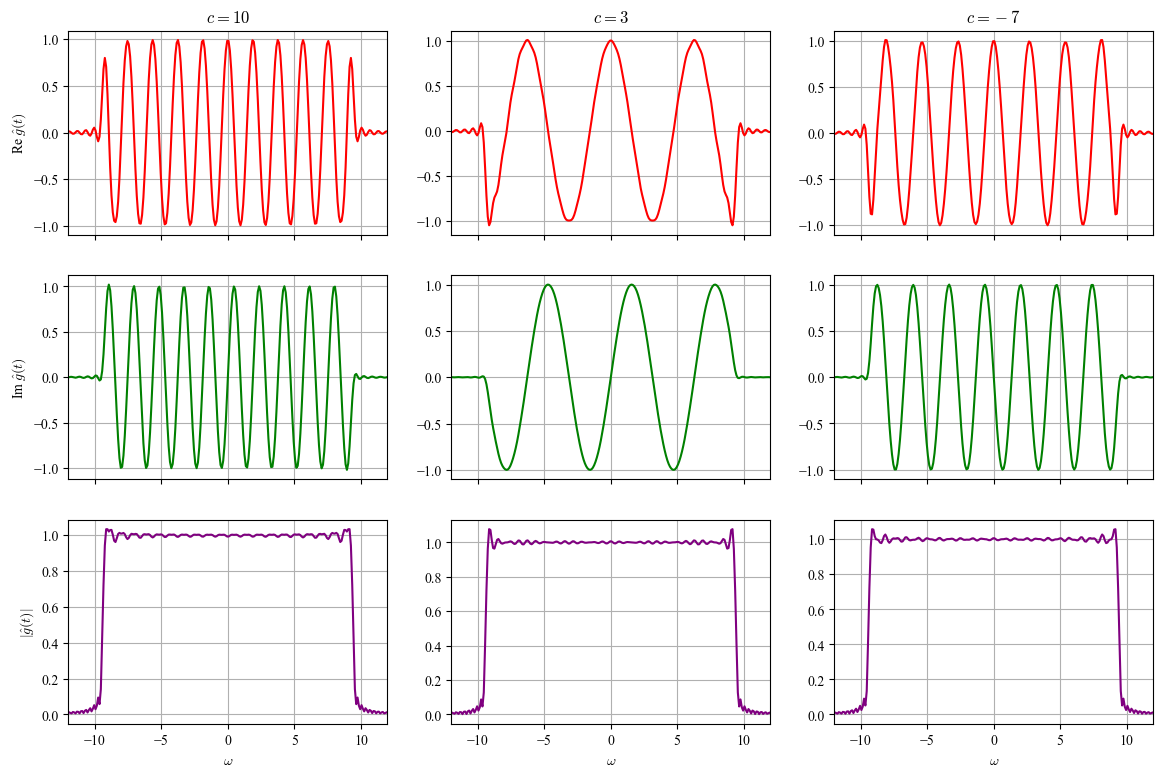

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(14,9), squeeze=True, sharex=True, sharey=False)

for i in range(3):
    ax[2, i].set_xlabel(r"$\omega$")

ax[0, 0].set_ylabel(r'Re $\hat g (t)$')
ax[1, 0].set_ylabel(r'Im $\hat g (t)$')
ax[2, 0].set_ylabel(r'$|\hat g(t)|$')

for i in range(3):
    ax[0, i].set_title(f'$c = {C[i]}$')


for i, c in zip(range(3), C):
    freq, fhat = transform(lambda t: g(t, c), lim=10, n_points=3000)

    for j in range(3):
        ax[j, i].grid()
        ax[j, i].set_xlim([-12, 12])
    

    ax[0, i].plot(freq, np.real(fhat), color='red')
    ax[1, i].plot(freq, np.imag(fhat), color='green')
    ax[2, i].plot(freq, np.abs(fhat) , color='purple')

fig.savefig(fname='../fig/task2/ft_image.svg', **FIGSAVE)

# Task 3

Audio duration: 4.67 seconds
Sampling rate: 22050 Hz


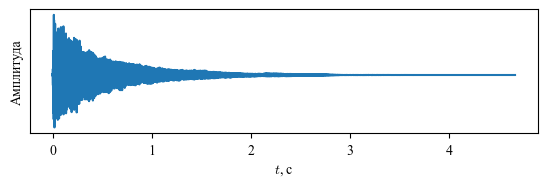

In [17]:
mp3path = '../sup/12.mp3'

# Load the audio file
y, sr = librosa.load(mp3path)

# Print basic information
print(f"Audio duration: {len(y)/sr:.2f} seconds")
print(f"Sampling rate: {sr} Hz")

# Plot waveform
plt.figure(figsize=(6, 2))
plt.plot(np.linspace(0, len(y)/sr, len(y)), y)
plt.xlabel('$t$, с')
plt.ylabel('Амплитуда')
plt.tight_layout()
plt.yticks([])

%mkdir -p '../fig/task3/'
plt.savefig(fname='../fig/task3/wave.svg', **FIGSAVE)



In [18]:
y2 = y[::5]
n2 = len(y2)
sr2 = sr//5


t = np.linspace(0, len(y2)/sr2, len(y2))
omega = np.linspace(0, sr2//2, n2//2)
Y = np.trapezoid(y2 * np.exp(-1j * 2*np.pi*omega[:,np.newaxis] * t), dx=1/sr, axis=-1)

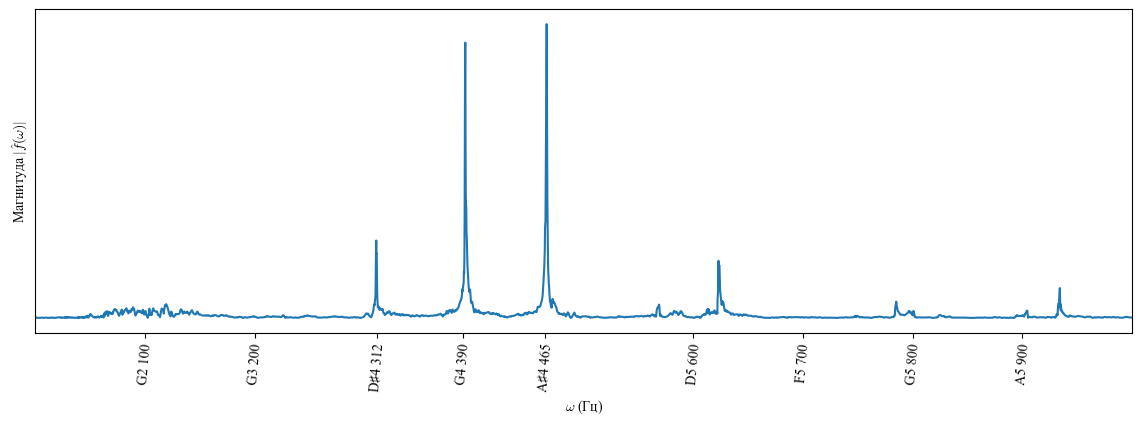

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(omega, np.abs(Y))

plt.xlabel(r'$\omega$ (Гц)')
plt.ylabel(r'Магнитуда $|\hat f (\omega)|$')
plt.tight_layout()

ticks = np.array([100, 200, 312, 390, 465, 600, 700, 800, 900])
np.sort(ticks)

labels = [librosa.hz_to_note(freq) + ' ' + str(int(freq)) for freq in ticks]

plt.xticks(ticks, rotation=85, labels=labels)
plt.yticks([])

plt.xlim([0,1000])
plt.margins(x=0, y=0.05)

plt.savefig(fname='../fig/task3/ft_image.svg', **FIGSAVE)